In [13]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def load_wav(file_path, sr=22050):
    """
    WAV 파일을 읽고 신호와 샘플링 속도를 반환
    :param file_path: WAV 파일 경로
    :param sr: 샘플링 속도 (기본값: 22050Hz)
    :return: 오디오 신호 (numpy array), 샘플링 속도
    """
    signal, sr = librosa.load(file_path, sr=sr)
    return signal, sr

def extract_features(signal, sr, feature_type='mfcc', n_mfcc=13):
    """
    오디오 신호에서 특징(MFCC 또는 파형 데이터) 추출
    :param signal: 오디오 신호
    :param sr: 샘플링 속도
    :param feature_type: 'mfcc' 또는 'waveform'
    :param n_mfcc: MFCC 계수 개수 (기본값: 13)
    :return: 특징 데이터 (numpy array)
    """
    if feature_type == 'mfcc':
        features = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    elif feature_type == 'waveform':
        features = signal
    else:
        raise ValueError("Unsupported feature_type. Choose 'mfcc' or 'waveform'.")
    return features

def lcss(seq1, seq2, epsilon):
    """
    Longest Common Subsequence (LCSS) 계산 함수
    """
    n, m = len(seq1), len(seq2)
    dp = np.zeros((n+1, m+1))
    matches = []

    for i in range(1, n+1):
        for j in range(1, m+1):
            if abs(seq1[i-1] - seq2[j-1]) <= epsilon:
                dp[i][j] = dp[i-1][j-1] + 1
                matches.append((i-1, j-1))
            else:
                dp[i][j] = max(dp[i-1][j], dp[i][j-1])

    return dp[n][m], matches

def visualize_lcss(seq1, seq2, matches):
    """
    LCSS 매칭 결과를 시각화
    """
    plt.figure(figsize=(10, 5))

    # 두 시계열 데이터 플롯
    plt.plot(seq1, label="Sequence 1", alpha=0.7, color="blue")
    plt.plot(seq2, label="Sequence 2", alpha=0.7, color="orange")

    # 매칭된 인덱스를 연결선으로 표시
    for idx1, idx2 in matches:
        plt.plot([idx1, idx2], [seq1[idx1], seq2[idx2]], "g--", alpha=0.3)

    plt.title("Longest Common Subsequence (LCSS)")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# 파일 경로
file1 = 'C:/Users/VISLAB-seongwon/Desktop/Sonar/shipsear, deepship/deepship_total/total/Cargo/2.wav'
file2 = 'C:/Users/VISLAB-seongwon/Desktop/Sonar/shipsear, deepship/deepship_total/total/Cargo/11.wav'

# WAV 파일 읽기
signal1, sr1 = load_wav(file1)
signal2, sr2 = load_wav(file2)


# 특징 추출 (MFCC 또는 파형 데이터 선택)
feature_type = 'mfcc'  # 'mfcc' 또는 'waveform'
features1 = extract_features(signal1, sr1, feature_type=feature_type)
features2 = extract_features(signal2, sr2, feature_type=feature_type)

# LCSS를 계산할 시계열 데이터 (예: 첫 번째 MFCC 계수 사용)
if feature_type == 'mfcc':
    seq1 = features1[0]  # 첫 번째 MFCC 계수
    seq2 = features2[0]
else:
    seq1 = features1
    seq2 = features2



In [14]:
print(len(seq1))
print(len(seq2))

18950
18993


In [15]:
# LCSS 계산 및 시각화
epsilon = 0.5  # 허용 오차
lcss_length, matches = lcss(seq1, seq2, epsilon)
print(f"LCSS 길이: {lcss_length}")



KeyboardInterrupt: 

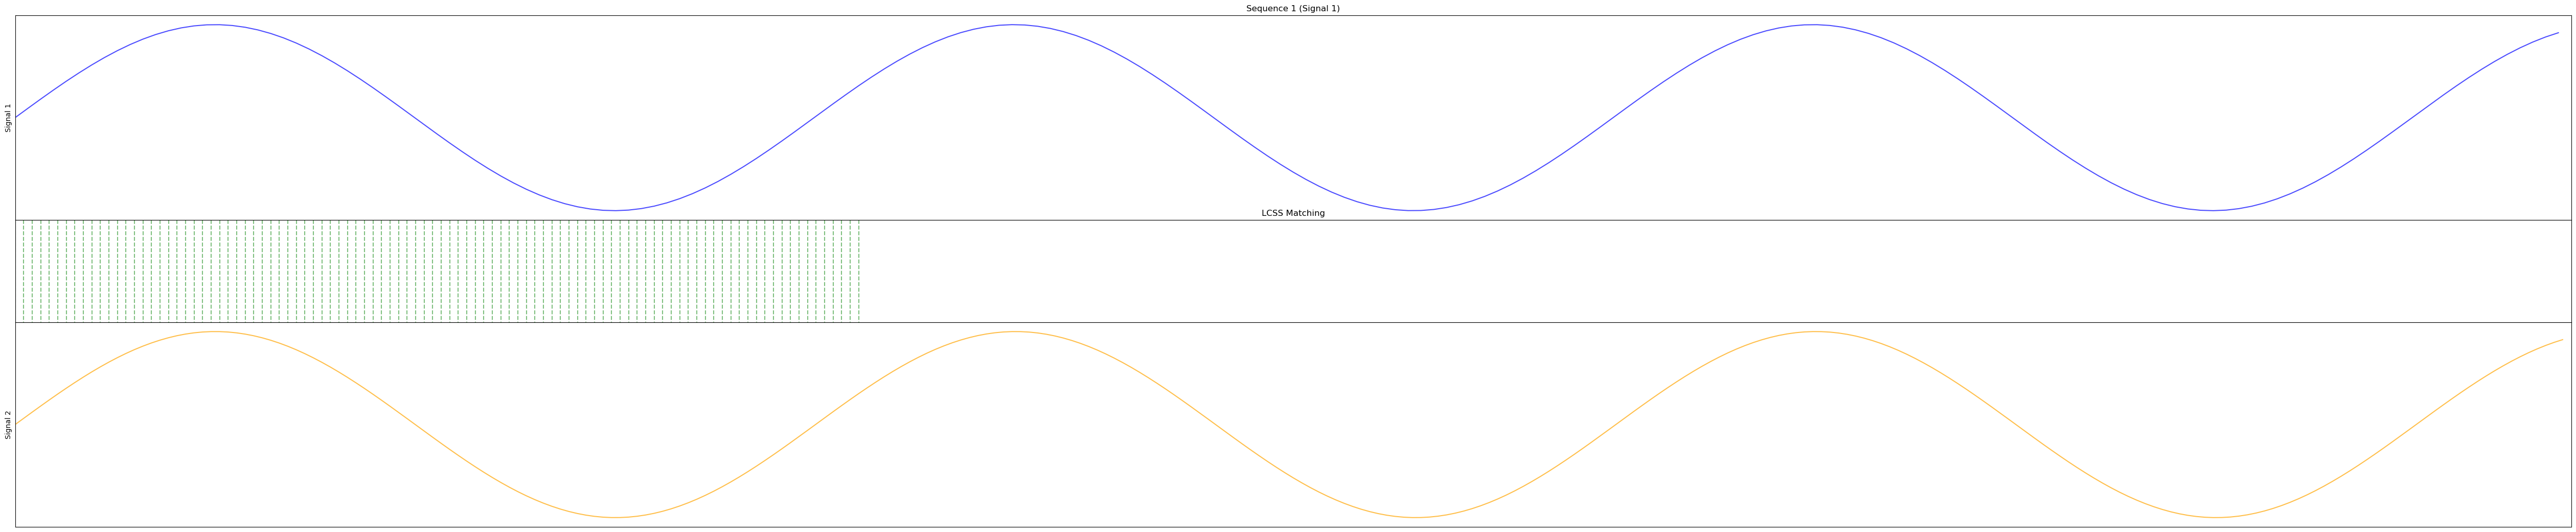

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_lcss_with_plots(seq1, seq2, matches):
    """
    LCSS 매칭 결과를 여러 플롯에 시각화
    """

    # 두 번째 큰 플롯 설정 (큰 그림)
    plt.figure(figsize=(50, 10))

    # 상단 플롯: 첫 번째 시계열(seq1)
    ax1 = plt.axes([0, 0.60, 1, 0.40])
    ax1.plot(seq1, label="Sequence 1", alpha=0.7, color="blue")
    ax1.set_ylabel('Signal 1')
    ax1.set_xticks([])          # x축 눈금 숨기기
    ax1.set_yticks([])          # y축 눈금 숨기기
    ax1.set_xlim(0, len(seq1))  # x축 범위 설정

    # 하단 플롯: 두 번째 시계열(seq2)
    ax2 = plt.axes([0, 0, 1, 0.40])
    ax2.plot(seq2, label="Sequence 2", alpha=0.7, color="orange")
    ax2.set_ylabel('Signal 2')
    ax2.set_xticks([])          # x축 눈금 숨기기
    ax2.set_yticks([])          # y축 눈금 숨기기
    ax2.set_xlim(0, len(seq2))  # x축 범위 설정

    # 중간 플롯: LCSS 매칭 표시
    ax3 = plt.axes([0, 0.40, 1, 0.20])
    line_color = 'g'  # 선 색상 (초록색)
    for idx1, idx2 in matches:
        ax3.plot([idx1, idx2], [1, -1], color=line_color, linestyle='--', alpha=0.5)

    ax3.set_xlim(0, max(len(seq1), len(seq2)))    # x축 범위 설정
    ax3.set_ylim(-1, 1)                           # y축 범위 설정
    ax3.set_xticks([])  # 중간 플롯의 x축 눈금 숨기기
    ax3.set_yticks([])  # 중간 플롯의 y축 눈금 숨기기

    # 각 플롯의 제목 추가
    ax1.set_title("Sequence 1 (Signal 1)")
    ax2.set_title("Sequence 2 (Signal 2)")
    ax3.set_title("LCSS Matching")

    # 플롯 보여주기
    plt.show()


# LCSS 매칭 결과 시각화
visualize_lcss_with_plots(seq1, seq2, matches)


C:\Users\VISLAB-seongwon\miniconda3\envs\sonar\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


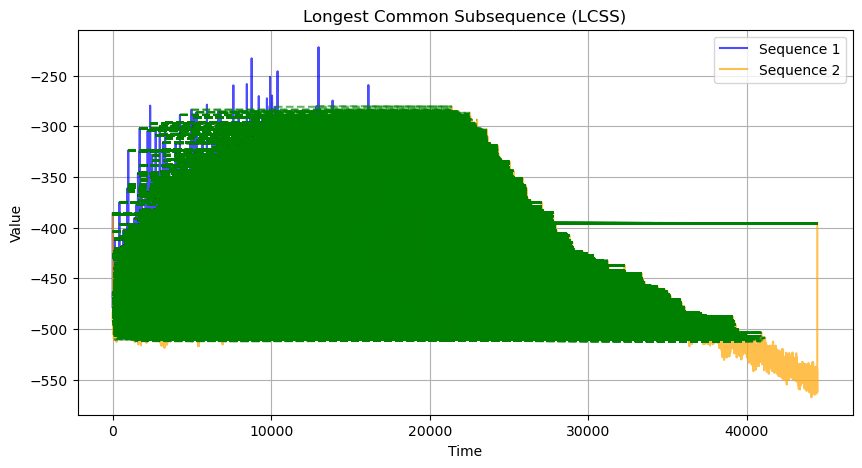

In [5]:
visualize_lcss(seq1, seq2, matches)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

def load_wav(file_path, sr=22050):
    """
    WAV 파일을 읽고 신호와 샘플링 속도를 반환
    :param file_path: WAV 파일 경로
    :param sr: 샘플링 속도 (기본값: 22050Hz)
    :return: 오디오 신호 (numpy array), 샘플링 속도
    """
    signal, sr = librosa.load(file_path, sr=sr)
    return signal, sr

def extract_features(signal, sr, feature_type='mfcc', n_mfcc=13):
    """
    오디오 신호에서 특징(MFCC 또는 파형 데이터) 추출
    :param signal: 오디오 신호
    :param sr: 샘플링 속도
    :param feature_type: 'mfcc' 또는 'waveform'
    :param n_mfcc: MFCC 계수 개수 (기본값: 13)
    :return: 특징 데이터 (numpy array)
    """
    if feature_type == 'mfcc':
        features = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
    elif feature_type == 'waveform':
        features = signal
    else:
        raise ValueError("Unsupported feature_type. Choose 'mfcc' or 'waveform'.")
    return features

def lcss_gpu(seq1, seq2, epsilon, device):
    """
    PyTorch를 사용하여 GPU에서 LCSS 계산 함수
    """
    # Tensors로 변환하여 GPU에서 처리
    seq1_tensor = torch.tensor(seq1, dtype=torch.float32, device=device)
    seq2_tensor = torch.tensor(seq2, dtype=torch.float32, device=device)
    
    n, m = len(seq1), len(seq2)
    dp = torch.zeros((n+1, m+1), dtype=torch.float32, device=device)
    matches = []

    for i in range(1, n+1):
        for j in range(1, m+1):
            if torch.abs(seq1_tensor[i-1] - seq2_tensor[j-1]) <= epsilon:
                dp[i][j] = dp[i-1][j-1] + 1
                matches.append((i-1, j-1))
            else:
                dp[i][j] = torch.max(dp[i-1][j], dp[i][j-1])

    return dp[n][m], matches

def visualize_lcss(seq1, seq2, matches):
    """
    LCSS 매칭 결과를 시각화
    """
    plt.figure(figsize=(10, 5))

    # 두 시계열 데이터 플롯
    plt.plot(seq1, label="Sequence 1", alpha=0.7, color="blue")
    plt.plot(seq2, label="Sequence 2", alpha=0.7, color="orange")

    # 매칭된 인덱스를 연결선으로 표시
    for idx1, idx2 in matches:
        plt.plot([idx1, idx2], [seq1[idx1], seq2[idx2]], "g--", alpha=0.6)

    plt.title("Longest Common Subsequence (LCSS)")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# 파일 경로
file1 = 'C:/Users/VISLAB-seongwon/Desktop/Sonar/shipsear, deepship/deepship_total/total/Tanker/7.wav'
file2 = 'C:/Users/VISLAB-seongwon/Desktop/Sonar/shipsear, deepship/deepship_total/total/Tug/4.wav'


# WAV 파일 읽기
signal1, sr1 = load_wav(file1)
signal2, sr2 = load_wav(file2)

# 특징 추출 (MFCC 또는 파형 데이터 선택)
feature_type = 'mfcc'  # 'mfcc' 또는 'waveform'
features1 = extract_features(signal1, sr1, feature_type=feature_type)
features2 = extract_features(signal2, sr2, feature_type=feature_type)

# LCSS를 계산할 시계열 데이터 (예: 첫 번째 MFCC 계수 사용)
if feature_type == 'mfcc':
    seq1 = features1[0]  # 첫 번째 MFCC 계수
    seq2 = features2[0]
else:
    seq1 = features1
    seq2 = features2

print(len(seq1))
print(len(seq2))

# GPU 사용 설정 (CUDA가 사용 가능하면 GPU로 설정)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# LCSS 계산 및 시각화
epsilon = 0.5  # 허용 오차
lcss_length, matches = lcss_gpu(seq1, seq2, epsilon, device)
print(f"LCSS 길이: {lcss_length}")
visualize_lcss(seq1, seq2, matches)


21663
44445


In [ ]:
epsilon = 0.5  # 허용 오차
lcss_length, matches = lcss_gpu(seq1, seq2, epsilon, device)

: 

: 

: 

In [ ]:
print(f"LCSS 길이: {lcss_length}")
visualize_lcss(seq1, seq2, matches)